# Assignment 1
## Question `1` (K-Nearest Neighbour)

| | |
|-|-|
| Course | Statistical Methods in AI |
| Release Date | `19.01.2023` |
| Due Date | `29.01.2023` |

### Instructions:
1.   Assignment must be implemented using python notebook only (Colab , VsCode , Jupyter etc.)
2.   You are allowed to use libraries for data preprocessing (numpy, pandas, nltk etc) and for algorithms as well (sklearn etc). You are not however allowed to directly use classifier models.
3.   The performance of the model will hold weightage but you will also be graded largely for data preprocessing steps , explanations , feature selection for vectors etc.
4.   Strict plagiarism checking will be done. An F will be awarded for plagiarism.

### The Dataset
The dataset is avaible in the zip file which is a collection of *11099 tweets*. The data will be in the form of a csv file. The ground truth is also given in the zip file which corresponds to whether a tweet was popular or not. Since the task involves selecting features yourself to vectorize a tweet , we suggest some data analysis of the columns you consider important.
<br><br>

### The Task
You have to build a classifier which can predict the popularity of the tweet, i.e , if the tweet was popular or not. You are required to use **KNN** algorithm to build the classifier and cannot use any inbuilt classifier. All columns are supposed to be analyzed , filtered and preprocessed to determine its importance as a feature in the vector for every tweet (Not every column will be useful).<br>
The Data contains the **raw text of the tweet**(in the text column) as well as other **meta data** like likes count , user followers count. Note that it might be useful to **create new columns** with useful information. For example, *number of hashtags* might be useful but is not directly present as a column.<br>
There are 3 main sub parts:
1. *Vectorize tweets using only meta data* - likes , user followers count , and other created data
2. *Vectorize tweets using only it's text*. This segment will require NLP techniques to clean the text and extract a vector using a BoW model. Here is a useful link for the same - [Tf-Idf](https://towardsdatascience.com/text-vectorization-term-frequency-inverse-document-frequency-tfidf-5a3f9604da6d). Since these vectors will be very large , we recommend reducing their dimensinality (~10 - 25). Hint: [Dimentionality Reduction](https://jonathan-hui.medium.com/machine-learning-singular-value-decomposition-svd-principal-component-analysis-pca-1d45e885e491). Please note that for this also you are allowed to use libraries.

3. *Combining the vectors from above two techinques to create one bigger vector*
<br>


Using KNN on these vectors build a classifier to predict the popularity of the tweet and report accuracies on each of the three methods as well as analysis. You can use sklearn's Nearest Neighbors and need not write KNN from scratch. (However you cannot use the classifier directly). You are expected to try the classifier for different number of neighbors and identify the optimal K value.

## Import necessary libraries

In [95]:
import pandas as pd
import numpy as np
import json
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA 

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Prateek\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Prateek\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Load and display the data

In [96]:
#your code here
df=pd.read_csv("Tweets.csv")
target=pd.read_csv("ground_truth.csv",names=["target"])

show=pd.merge(df,target,left_index=True, right_index=True)

In [97]:
show

,created_at,id,id_str,text,truncated,entities,metadata,source,is_quote_status,retweet_count,...,user_name,user_screen_name,user_followers_count,user_friends_count,user_listed_count,user_created_at,user_favourites_count,user_verified,user_statuses_count,target
0,Tue Jul 31 13:34:34 +0000 2018,1.024290e+18,1.024290e+18,RT @EdwardTHardy: The 7th US Circuit Court of ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",False,113,...,Sherry Wahl,queenfancygirl,153,264,7,Thu Mar 18 19:16:31 +0000 2010,32984,False,31308,0.0
1,Tue Jul 31 13:34:14 +0000 2018,1.024290e+18,1.024290e+18,RT @VenomMovie: The world has enough superhero...,False,"{'hashtags': [{'text': 'Venom', 'indices': [64...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",False,5902,...,Kay Khairil ðŸŒ,ikaykhairil,780,382,12,Wed Mar 17 03:27:51 +0000 2010,6648,False,87272,0.0
2,Tue Jul 31 13:34:40 +0000 2018,1.024290e+18,1.024290e+18,RT @FutbolBible: Teachers vs Students match &a...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",False,3745,...,Charlie Hamilton,ch100897,255,246,1,Sun Mar 03 09:23:03 +0000 2013,5426,False,1731,1.0
3,Tue Jul 31 13:34:27 +0000 2018,1.024290e+18,1.024290e+18,RT @mashable: Someone from 'The Office' actual...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,10,...,Mike Santos,mikesantosx71,2419,2428,4,Thu May 25 14:37:29 +0000 2017,5993,False,2153,0.0
4,Tue Jul 31 13:34:28 +0000 2018,1.024290e+18,1.024290e+18,RT @_missj0hnson: Iâ€™m at Starbucks asking fo...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",False,25306,...,Soots,DaAverageDingus,314,722,7,Tue Mar 15 01:14:02 +0000 2011,6285,False,33503,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11094,Tue Jul 31 13:34:36 +0000 2018,1.024290e+18,1.024290e+18,RT @AnnieOakley2015: @AVoiceForAllGA Following...,False,"{'hashtags': [{'text': 'GA10', 'indices': [93,...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",False,5,...,TrumpNeck,Francis_3,802,1353,7,Thu May 28 12:02:54 +0000 2009,79149,False,6491,0.0
11095,Tue Jul 31 13:34:15 +0000 2018,1.024290e+18,1.024290e+18,RT @BillOReilly: What exactly is Donald Trump ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",False,8393,...,atm,allen_mcdowell,429,599,12,Wed Oct 10 11:37:34 +0000 2012,2029,False,5065,1.0
11096,Tue Jul 31 13:34:14 +0000 2018,1.024290e+18,1.024290e+18,"Paradoxically, your good intentions may stand ...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://www.twittascope.com"" rel=""nofo...",False,0,...,Jan15î„… .,yellow_naeeeee,135,94,0,Mon Sep 23 22:37:49 +0000 2013,90,False,4265,0.0
11097,Tue Jul 31 13:34:35 +0000 2018,1.024290e+18,1.024290e+18,RT @enblocibc: Less than 4 days to go for the ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",False,18,...,âœ¨MC Capital Venturesâœ¨,MCCapitalV,505,243,8,Thu Feb 01 23:58:16 +0000 2018,15829,False,13604,0.0


## Exploratory Data Analysis
*This is an ungraded section but is recommended to get a good grasp on the dataset*

In [98]:
df["is_quote_status"]=pd.Categorical(df.is_quote_status).codes

df["lang"]=pd.Categorical(df.lang).codes

df["user_verified"]=pd.Categorical(df.user_verified).codes

target.target=pd.Categorical(target.target).codes


## Part-1
*Vectorize tweets using only meta data*

In [99]:
def get_features(df):
  """
  Funtion to return a matrix of dimensions (number of tweets, number of chosen features)
  Input parameters to this funcion are to be chosen as per requirement (Example: Loaded dataframe of the dataset) 
  """
  X=df.drop(['created_at','id','id_str','text','truncated','entities','metadata','source','user_name','user_screen_name','user_created_at'],axis=1)
  return np.array(X)

X=get_features(df)
Y=np.array(target.target)


  # your code here

Perform KNN using the vector obtained from get_features() function. Following are the steps to be followed:
1. Normalise the vectors
2. Split the data into training and test to estimate the performance.
3. Fit the Nearest Neughbiurs module to the training data and obtain the predicted class by getting the nearest neighbours on the test data.
4. Report the accuracy, chosen k-value and method used to obtain the predicted class. Hint: Plot accuracies for a range of k-values. 

Accuracy -  96.006 %


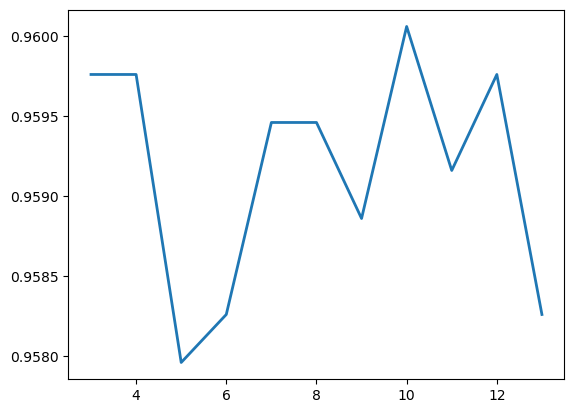

In [100]:
# your code here
def getAccuracy(z,X,Y):
    accuracy=np.empty(10)
    ind=0
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
    nbrs = NearestNeighbors(n_neighbors=z, algorithm='ball_tree').fit(X_train)
    distances, indices = nbrs.kneighbors(X_test)
    k=0
    y_pred=np.empty(shape=len(y_test))
    for i in range (len(y_train[indices])):
        y_pred[k]=np.bincount(y_train[indices][i]).argmax()
        k=k+1
        
    return accuracy_score(y_test, y_pred)
    
def _normalize_meta(X):
    normalizer=StandardScaler()
    normalized_data=normalizer.fit_transform(pd.DataFrame(X))
    return normalized_data
    
k_value=[]
accuracys=[]
X=get_features(df)
X=_normalize_meta(X)
for i in range(3,14):
    k_value.append(i)
    
    acc=getAccuracy(i,X,Y)
    accuracys.append(acc)

fig, ax = plt.subplots()
a=round(max(accuracys),5)*100
print("Accuracy - ",a,"%")
ax.plot(k_value, accuracys, linewidth=2.0)
plt.show()

## Part-2
Vectorize tweets based on the text. More details and reference links can be checked on the Tasks list in the start of the notebook

In [101]:
def tweet_vectoriser(df):
  """
  Funtion to return a matrix of dimensions (number of tweets, number of features extracted per tweet)
  Following are the steps for be followed:
    1. Remove links, tags and hashtags from each tweet.
    2. Apply TF-IDF on the tweets to extract a vector. 
    3. Perform dimensionality reduction on the obtained vector. 
  Input parameters to this funcion are to be chosen as per requirement (Example: Array of tweets) 
  """
  vectorizer = TfidfVectorizer()
  words=stopwords.words('english')
  lemmatizer = WordNetLemmatizer()
  tweet=df['text']
  cleaned=[]
  def cleanText(i):
      
      i=i.lower()
      i = re.sub("@[A-Za-z0-9_]+","", i)
      i = re.sub("#[A-Za-z0-9_]+","", i)
      i = re.sub(r"http\S+", "", i)
      i = re.sub(r"www.\S+", "", i) 
      i = re.sub("rt :", "", i)
      i = re.sub('[()!?]', ' ', i)
      i = re.sub('\[.*?\]',' ', i) 
      i = re.sub("[^a-z0-9]"," ", i)
      i = i.split()
      i = " ".join(lemmatizer.lemmatize(word) for word in i)
          
      return i

  vectorizer = TfidfVectorizer()
  tweet=tweet.apply(cleanText)
  tweet_data =  pd.DataFrame(vectorizer.fit_transform(tweet.values).toarray(), columns=vectorizer.get_feature_names())
  return np.array(tweet_data)
  # your code here

Perform KNN using the vector obtained from tweet_vectoriser() function. Following are the steps to be followed:

1. Normalise the vectors
2. Split the data into training and test to estimate the performance.
3. Fit the Nearest Neughbiurs module to the training data and obtain the predicted class by getting the nearest neighbours on the test data.
4. Report the accuracy, chosen k-value and method used to obtain the predicted class. Hint: Plot accuracies for a range of k-values.

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Accuracy -  93.273 %


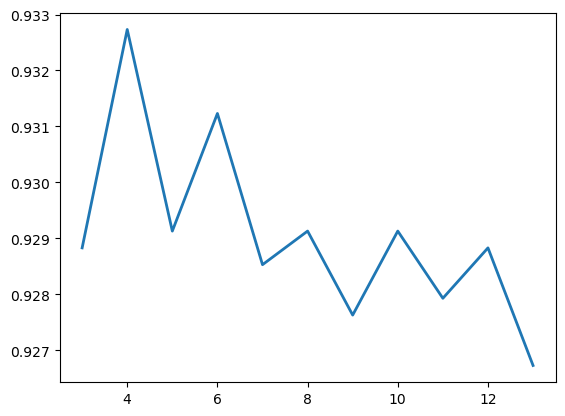

In [102]:
# your code here
def getAccuracy(z,X,Y):
    accuracy=np.empty(10)
    ind=0
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
    nbrs = NearestNeighbors(n_neighbors=z, algorithm='ball_tree').fit(X_train)
    distances, indices = nbrs.kneighbors(X_test)
    k=0
    y_pred=np.empty(shape=len(y_test))
    for i in range (len(y_train[indices])):
        y_pred[k]=np.bincount(y_train[indices][i]).argmax()
        k=k+1
        
    return accuracy_score(y_test, y_pred)
    
def _normalize_text(X):
    X=pd.DataFrame(X)
    normalizer=StandardScaler()
    normalizer.fit(X)
    normalized_data=normalizer.transform(X)
    pca = PCA(n_components = 15)
    data_pca = np.array(pca.fit_transform(pd.DataFrame(normalized_data)))
    return data_pca
    
k_value=[]
accuracys=[]
X=tweet_vectoriser(df)
X=_normalize_text(X)
for i in range(3,14):
    k_value.append(i)
    acc=getAccuracy(i,X,Y)
    accuracys.append(acc)

fig, ax = plt.subplots()
a=round(max(accuracys),5)*100
print("Accuracy - ",a,"%")
ax.plot(k_value, accuracys, linewidth=2.0)
plt.show()

## Part-3
### Subpart-1

Combine both the vectors obtained from the tweet_vectoriser() and get_features()

In [103]:
def get_combined_vector(df):
    text=tweet_vectoriser(df)
    text=_normalize_text(text)
    meta=get_features(df)
    data=np.hstack((text,meta))
    return data


Perform KNN using the vector obtained in the previous step. Following are the steps to be followed:

1. Normalise the vectors
2. Split the data into training and test to estimate the performance.
3. Fit the Nearest Neughbiurs module to the training data and obtain the predicted class by getting the nearest neighbours on the test data.
4. Report the accuracy, chosen k-value and method used to obtain the predicted class. Hint: Plot accuracies for a range of k-values.

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Accuracy -  96.036 %


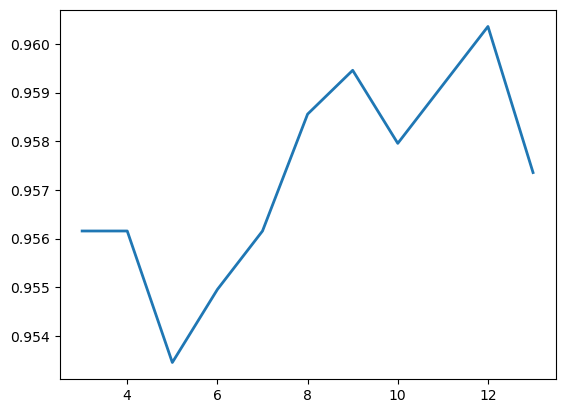

In [104]:
# your code here# your code here
def getAccuracy(z,X,Y):
    accuracy=np.empty(10)
    ind=0
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
    nbrs = NearestNeighbors(n_neighbors=z, algorithm='ball_tree').fit(X_train)
    distances, indices = nbrs.kneighbors(X_test)
    k=0
    y_pred=np.empty(shape=len(y_test))
    for i in range (len(y_train[indices])):
        y_pred[k]=np.bincount(y_train[indices][i]).argmax()
        k=k+1
        
    return accuracy_score(y_test, y_pred)
    
def _normalize_data(X):
    normalizer=StandardScaler()
    normalizer.fit(pd.DataFrame(X))
    normalized_data=normalizer.transform(X)
    return normalized_data
    
k_value=[]
accuracys=[]
X=get_combined_vector(df)
X=_normalize_data(X)
for i in range(3,14):
    k_value.append(i)
    acc=getAccuracy(i,X,Y)
    accuracys.append(acc)

fig, ax = plt.subplots()
a=round(max(accuracys),5)*100
print("Accuracy - ",a,"%")
ax.plot(k_value, accuracys, linewidth=2.0)
plt.show()

### Subpart-2

Explain the differences between the accuracies obtained in each part above based on the features used.

1. In part 1 the features that are used are ['is_quote_status', 'retweet_count', 'favorite_count', 'lang',
       'user_followers_count', 'user_friends_count', 'user_listed_count',
       'user_favourites_count', 'user_verified', 'user_statuses_count' ],since all these columns affect the data directly and the accuracy we are getting with this meta-data is close to 96%
2. In part 2 the text field is used which is the main contents of the tweet and the dimensionality of vectorised tweets is reduced to 15 and Accuracy       is close to 93%
3. In part 3 ['is_quote_status', 'retweet_count', 'favorite_count', 'lang',
       'user_followers_count', 'user_friends_count', 'user_listed_count',
       'user_favourites_count', 'user_verified', 'user_statuses_count' ] and Text field is used whose dimesion is reduced to 15,a  total of 25 columns are used and The accuracy is 96% 

In [105]:
show.corr()

<ipython-input-105-01da6df2530f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  show.corr()


,id,id_str,truncated,is_quote_status,retweet_count,favorite_count,user_followers_count,user_friends_count,user_listed_count,user_favourites_count,user_verified,user_statuses_count,target
id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id_str,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
truncated,NaN,NaN,1.000000,-0.027945,-0.093879,0.055683,0.032816,-0.000389,0.031705,-0.098136,0.087631,-0.035235,-0.119291
is_quote_status,NaN,NaN,-0.027945,1.000000,0.122640,-0.007736,-0.006505,-0.006400,-0.010836,0.048367,-0.002869,0.014019,0.104302
retweet_count,NaN,NaN,-0.093879,0.122640,1.000000,-0.008840,-0.005876,-0.022227,-0.034294,-0.022651,-0.028056,-0.029061,0.518563
favorite_count,NaN,NaN,0.055683,-0.007736,-0.008840,1.000000,0.062949,0.011462,0.105127,0.009909,0.088525,0.002946,-0.011281
user_followers_count,NaN,NaN,0.032816,-0.006505,-0.005876,0.062949,1.000000,0.059670,0.135102,-0.001710,0.151950,0.044369,-0.008030
user_friends_count,NaN,NaN,-0.000389,-0.006400,-0.022227,0.011462,0.059670,1.000000,0.192920,0.091460,0.053371,0.227707,-0.035525
user_listed_count,NaN,NaN,0.031705,-0.010836,-0.034294,0.105127,0.135102,0.192920,1.000000,0.103168,0.385425,0.279984,-0.047569
user_favourites_count,NaN,NaN,-0.098136,0.048367,-0.022651,0.009909,-0.001710,0.091460,0.103168,1.000000,-0.009497,0.356647,-0.025775
